In [1]:
%reset -f

In [2]:
import random
from math import sqrt, sin, cos, exp, pow, pi, log
import handcalcs.render
import numpy as np
import sympy as sp
import copy
from sympy import Symbol as symbol
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
PD = 184
import scipy.stats as stats
from scipy import integrate
%matplotlib inline
# from markovchain import MarkovChain as MC
from tabulate import tabulate
from IPython.display import display, HTML

In [3]:
def Print2D(_data, _col_names=[], _row_names=[]):
    data = copy.deepcopy(_data)
    col_names = copy.deepcopy(_col_names)
    row_names = copy.deepcopy(_row_names)
    if len(col_names) >= len(data[0]):
        col_names.insert(0, "\\")
    elif len(row_names) != 0:
        while len(col_names) < len(data[0]) + 1:
            col_names.insert(0, "_")
    markdown = "<table>"
    if len(col_names) != 0:
        markdown += "<tr>"
        for i in range(len(col_names)):
            markdown += "<th>"+str(col_names[i])+"</th>"
        markdown += "</tr>"
    for i in range(len(data)):
        markdown += "<tr>"
        if (i + 1) <= len(row_names):
            markdown += "<th>"+str(row_names[i])+"</th>"
        for j in range(len(data[0])):
            markdown += "<td>"+str(round(data[i][j], 3))+"</td>"
        markdown += "</tr>"
    markdown += "</table>"
    display(HTML(markdown))

In [4]:
# Варіант 20 - 10 = 10
X = range(-3, 5)
KSI_0 = [4.90,-2.08,-1.95,-0.85, 0.63,-0.18, 1.87, 3.11, 4.01,-2.99]
P = [[  0.05,  0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.12, 0.13, 0.13],
       [0,     0.19, 0.18, 0.15, 0.12, 0.10, 0.08, 0.07, 0.06, 0.05],
       [0,     0,    0.07, 0.08, 0.09, 0.11, 0.13, 0.15, 0.17, 0.20],
       [0,     0,    0,    0.20, 0.18, 0.15, 0.13, 0.12, 0.12, 0.10],
       [0,     0,    0,    0,    0.05, 0.09, 0.18, 0.20, 0.23, 0.25],
       [0,     0,    0,    0,    0,    0.30, 0.25, 0.20, 0.15, 0.10],
       [0,     0,    0,    0,    0,    0,    0.05, 0.15, 0.35, 0.45],
       [0,     0,    0,    0,    0,    0,    0,    0.45, 0.35, 0.20],
       [0,     0,    0,    0,    0,    0,    0,    0,    0.25, 0.75],
       [0,     0,    0,    0,    0,    0,    0,    0,    0,    1.00]]
pp =  [[0.5,   0.5,  0,    0,    0,    0,    0,    0,     0,   0]]

k = 10

def MarkovProcess_dP_dt(dens, prob, steps=1 , show=False):
    for _ in range(steps):
        prob.append([])
        for i in range(len(dens)):
            incoming_sum_l_p = 0
            outcoming_sum_l = 0
            for j in range(len(dens[0])):
                incoming_sum_l_p += dens[j][i] * prob[-2][j]
                outcoming_sum_l += dens[i][j]
                #display("{} {} in {} out {}".format(i+1, j+1, dens[j][i]*prob[-2][i], dens[i][j]))
            outcoming_p_sum_l = prob[-2][i] * outcoming_sum_l
            #display("incoming_sum_l_p {} - outcoming_p_sum_l {}".format(incoming_sum_l_p, outcoming_p_sum_l))
            prob[-1].append(incoming_sum_l_p - outcoming_p_sum_l)
        prob[-1] = [(prob[-2][i] + prob[-1][i]) for i in range(len(prob[-1]))]
    if show:
        Print2D(prob)
        print("[-1].sum() = "+str(np.sum(np.array(prob[-1]))))
    #return prob

MarkovProcess_dP_dt(P, pp, k, True)

0.5,0.5,0,0,0,0,0,0,0,0
0.025,0.13,0.13,0.12,0.11,0.105,0.1,0.095,0.095,0.09
0.001,0.026,0.035,0.056,0.057,0.089,0.097,0.147,0.181,0.311
0.0,0.005,0.007,0.018,0.019,0.047,0.052,0.124,0.171,0.557
0.0,0.001,0.001,0.005,0.005,0.02,0.022,0.08,0.119,0.746
0.0,0.0,0.0,0.001,0.001,0.007,0.008,0.045,0.071,0.866
0.0,0.0,0.0,0.0,0.0,0.003,0.003,0.024,0.038,0.932
0.0,0.0,0.0,0.0,0.0,0.001,0.001,0.012,0.019,0.967
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006,0.009,0.984
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003,0.004,0.993
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001,0.002,0.997


[-1].sum() = 1.0


In [5]:
def sort(x):
    x_copy = copy.deepcopy(x)
    x_copy.sort()
    return x_copy

def distribution(p,x):
    n = len(p)
    y = [0 for _ in range(n)]
    for i in range(n):
        gamma = random.random()
        a = 0
        for j in range(n):
            a += p[j]
            if gamma < a:
                y[i] = x[j]
                break
    return y

def MarkovProcess(k,pp,ksi):
    xx = [distribution(sort(pp[i]), ksi) for i in range(len(pp))]
    Print2D(xx)
    return xx

zz = MarkovProcess(k, pp, KSI_0)

-2.99,-2.99,4.01,4.01,4.01,-2.99,4.01,-2.99,4.01,4.01
3.11,-0.18,4.01,-1.95,0.63,-0.85,-2.99,-0.85,-0.18,-2.08
-1.95,4.01,-2.99,3.11,0.63,-0.18,4.01,4.01,0.63,0.63
-2.99,-2.99,-2.99,1.87,-2.99,-2.99,-2.99,-2.99,-2.99,-2.99
-2.99,-2.99,-2.99,-2.99,-2.99,-2.99,-2.99,4.01,-2.99,-2.99
-2.99,-2.99,4.01,-2.99,-2.99,-2.99,-2.99,-2.99,-2.99,-2.99
-2.99,-2.99,-2.99,-2.99,-2.99,-2.99,-2.99,-2.99,-2.99,-2.99
-2.99,-2.99,-2.99,-2.99,-2.99,-2.99,-2.99,-2.99,-2.99,-2.99
-2.99,-2.99,-2.99,-2.99,-2.99,-2.99,-2.99,-2.99,-2.99,-2.99
-2.99,-2.99,-2.99,-2.99,-2.99,-2.99,-2.99,-2.99,-2.99,-2.99
-2.99,-2.99,-2.99,-2.99,-2.99,-2.99,-2.99,-2.99,-2.99,-2.99


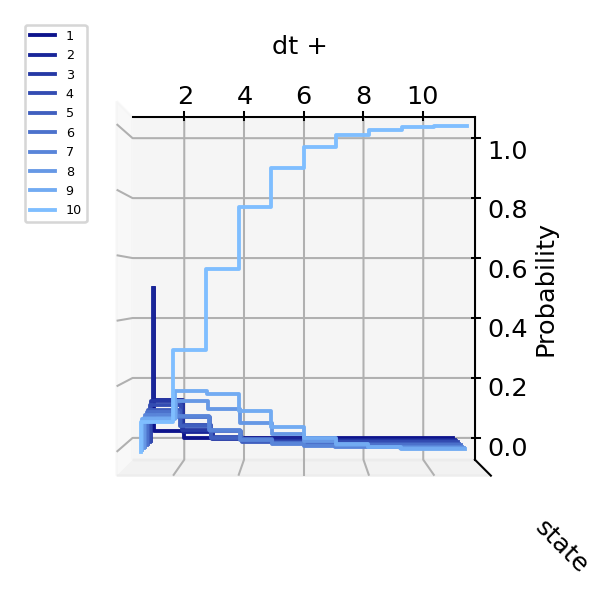

<Figure size 432x288 with 0 Axes>

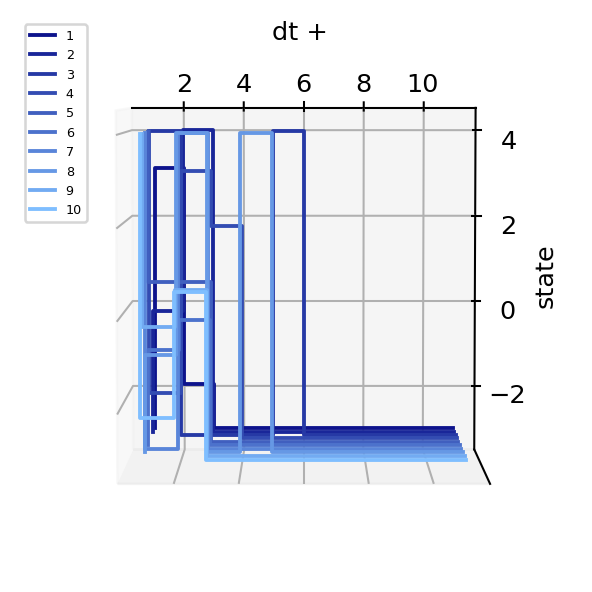

<Figure size 432x288 with 0 Axes>

In [6]:
def Plot3DPurpose(data, xlabel, ylabel, zlabel=None, viewinit1=94, viewinit2=-90):
    fig = plt.figure(dpi=PD)
    ax = plt.axes(projection='3d')
    for i in range(len(data[0])):
        toplot_y = []
        prev = data[0][i]
        for j in range(len(data)):
            curr = data[j][i]
            toplot_y.append(curr)
            prev = curr
        toplot_x = [(j + 1) for j in range(len(data))]
        toplot_z = [i for j in range(len(data))]
        scale = (i+1) / len(data[0])
        r = (0 + 127 * scale) / 255
        g = (0 + 190 * scale) / 255
        b = (127 + 128 * scale) / 255
        plt.step(toplot_x, toplot_y, toplot_z,
                 label=str(i+1), color=(r,g,b))
    ax.view_init(viewinit1, viewinit2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    ax.set_zticks([])
    if zlabel != None:
        ax.set_zlabel(zlabel)
    ax.legend(prop={'size': 5}, loc='upper left')
    plt.figure().clear()

Plot3DPurpose(pp, 'dt + ', 'Probability', "state", 90, -90)
Plot3DPurpose(zz, 'dt + ', 'state')